In [1]:
import pandas as pd
import json
import matplotlib.font_manager as fm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

font_dirs = ['./font'] # 폰트경로
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)
plt.rcParams['font.family'] = 'Noto Sans CJK KR'
%config InlineBackend.figure_format = 'retina'

In [2]:
def set_lean(d):
    f1,f2,f3,f4,f5 = d['2016|입학정원'],d['2017|입학정원'],d['2018|입학정원'],d['2019|입학정원'],d['2020|입학정원']
    n1,n2,n3,n4,n5 = d['2016|입학자수'],d['2017|입학자수'],d['2018|입학자수'],d['2019|입학자수'],d['2020|입학자수']
    return pd.Series((n1-f1,n2-f2,n3-f3,n4-f4,n5-f5))
def normalize(row):
    max_value, min_value = row[['2016','2017','2018','2019','2020']].max(), row[['2016','2017','2018','2019','2020']].min()
    d1,d2,d3,d4,d5 = row['2016'], row['2017'], row['2018'], row['2019'], row['2020']
    print(d1,d2,d3,d4,d5)
    denorm=max_value-min_value
    print(max_value, min_value)
    d1-=min_value
    d2-=min_value
    d3-=min_value
    d4-=min_value
    d5-=min_value
    if denorm==0:
        return pd.Series((0,0,0,0,0))
    print((d1/denorm,d2/denorm,d3/denorm,d4/denorm,d5/denorm))
    return pd.Series((d1/denorm,d2/denorm,d3/denorm,d4/denorm,d5/denorm))

In [3]:
df = pd.read_json('data/data.json')

In [4]:
df.head()

,index,시도,2016|입학정원,2016|입학자수,2016|rate,2017|입학정원,2017|입학자수,2017|rate,2018|입학정원,2018|입학자수,2018|rate,2019|입학정원,2019|입학자수,2019|rate,2020|입학정원,2020|입학자수,2020|rate
0,서울|강남구,서울,440.0,457.0,103.628118,449.0,456.0,101.333333,449.0,439.0,97.555556,554.0,619.0,111.531532,554.0,598.0,107.747748
1,서울|강동구,서울,50.0,48.0,94.117647,50.0,86.0,168.627451,50.0,20.0,39.215686,50.0,35.0,68.627451,50.0,27.0,52.941176
2,서울|강북구,서울,3621.0,3474.0,95.913860,3561.0,2843.0,79.814711,3561.0,3341.0,93.795620,3561.0,3278.0,92.026951,3561.0,4204.0,118.023582
3,서울|강서구,서울,742.0,831.0,111.843876,734.0,850.0,115.646259,3701.0,3214.0,86.817936,3701.0,3055.0,82.522961,3701.0,2684.0,72.501351
4,서울|관악구,서울,8453.0,8729.0,103.252898,8447.0,8612.0,101.941288,8491.0,8494.0,100.023552,8471.0,8343.0,98.477337,8457.0,8541.0,100.981319


In [5]:
# new_df=pd.DataFrame()
df[['2016','2017','2018','2019','2020']]=df.apply(set_lean, axis=1)

In [6]:
df=df.dropna() # data 4개 NaN 존재
df

,index,시도,2016|입학정원,2016|입학자수,2016|rate,2017|입학정원,2017|입학자수,2017|rate,2018|입학정원,2018|입학자수,...,2019|입학자수,2019|rate,2020|입학정원,2020|입학자수,2020|rate,2016,2017,2018,2019,2020
0,서울|강남구,서울,440.0,457.0,103.628118,449.0,456.0,101.333333,449.0,439.0,...,619.0,111.531532,554.0,598.0,107.747748,17.0,7.0,-10.0,65.0,44.0
1,서울|강동구,서울,50.0,48.0,94.117647,50.0,86.0,168.627451,50.0,20.0,...,35.0,68.627451,50.0,27.0,52.941176,-2.0,36.0,-30.0,-15.0,-23.0
2,서울|강북구,서울,3621.0,3474.0,95.913860,3561.0,2843.0,79.814711,3561.0,3341.0,...,3278.0,92.026951,3561.0,4204.0,118.023582,-147.0,-718.0,-220.0,-283.0,643.0
3,서울|강서구,서울,742.0,831.0,111.843876,734.0,850.0,115.646259,3701.0,3214.0,...,3055.0,82.522961,3701.0,2684.0,72.501351,89.0,116.0,-487.0,-646.0,-1017.0
4,서울|관악구,서울,8453.0,8729.0,103.252898,8447.0,8612.0,101.941288,8491.0,8494.0,...,8343.0,98.477337,8457.0,8541.0,100.981319,276.0,165.0,3.0,-128.0,84.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,경남|사천시,경남,240.0,320.0,132.780083,240.0,279.0,115.767635,240.0,276.0,...,268.0,111.203320,240.0,248.0,102.904564,80.0,39.0,36.0,28.0,8.0
157,경남|양산시,경남,2051.0,2175.0,105.994152,1873.0,1939.0,103.468517,1716.0,1926.0,...,1832.0,111.030303,1620.0,1835.0,113.201727,124.0,66.0,210.0,183.0,215.0
158,경남|진주시,경남,8501.0,8953.0,105.304634,8224.0,8593.0,104.474164,8135.0,8521.0,...,8080.0,99.938157,7870.0,7861.0,99.872951,452.0,369.0,386.0,-4.0,-9.0
159,경남|창원시,경남,11307.0,11673.0,103.227803,11014.0,11384.0,103.349977,10824.0,11006.0,...,10967.0,102.104087,10540.0,10519.0,99.791291,366.0,370.0,182.0,227.0,-21.0


In [7]:
df.isnull().sum()

index        0
시도           0
2016|입학정원    0
2016|입학자수    0
2016|rate    0
2017|입학정원    0
2017|입학자수    0
2017|rate    0
2018|입학정원    0
2018|입학자수    0
2018|rate    0
2019|입학정원    0
2019|입학자수    0
2019|rate    0
2020|입학정원    0
2020|입학자수    0
2020|rate    0
2016         0
2017         0
2018         0
2019         0
2020         0
dtype: int64

In [8]:
df[['x1','x2','x3','x4','x5']]=df.apply(normalize, axis=1)

17.0 7.0 -10.0 65.0 44.0
65.0 -10.0
(0.36, 0.22666666666666666, 0.0, 1.0, 0.72)
-2.0 36.0 -30.0 -15.0 -23.0
36.0 -30.0
(0.42424242424242425, 1.0, 0.0, 0.22727272727272727, 0.10606060606060606)
-147.0 -718.0 -220.0 -283.0 643.0
643.0 -718.0
(0.4195444526083762, 0.0, 0.36590742101396034, 0.319617927994122, 1.0)
89.0 116.0 -487.0 -646.0 -1017.0
116.0 -1017.0
(0.9761694616063548, 1.0, 0.4677846425419241, 0.32744924977934686, 0.0)
276.0 165.0 3.0 -128.0 84.0
276.0 -128.0
(1.0, 0.7252475247524752, 0.32425742574257427, 0.0, 0.5247524752475248)
380.0 130.0 814.0 481.0 1762.0
1762.0 130.0
(0.15318627450980393, 0.0, 0.41911764705882354, 0.21507352941176472, 1.0)
679.0 651.0 634.0 603.0 724.0
724.0 603.0
(0.628099173553719, 0.39669421487603307, 0.256198347107438, 0.0, 1.0)
4.0 5.0 -1.0 5.0 -2.0
5.0 -2.0
(0.8571428571428571, 1.0, 0.14285714285714285, 1.0, 0.0)
868.0 839.0 849.0 1344.0 1412.0
1412.0 839.0
(0.0506108202443281, 0.0, 0.017452006980802792, 0.881326352530541, 1.0)
42.0 45.0 58.0 29.0 23

98.0 95.0 144.0 101.0 168.0
168.0 95.0
(0.0410958904109589, 0.0, 0.6712328767123288, 0.0821917808219178, 1.0)
558.0 436.0 703.0 609.0 141.0
703.0 141.0
(0.7419928825622776, 0.5249110320284698, 1.0, 0.8327402135231317, 0.0)
231.0 37.0 142.0 205.0 37.0
231.0 37.0
(1.0, 0.0, 0.5412371134020618, 0.865979381443299, 0.0)
101.0 113.0 69.0 45.0 86.0
113.0 45.0
(0.8235294117647058, 1.0, 0.35294117647058826, 0.0, 0.6029411764705882)
53.0 88.0 113.0 84.0 79.0
113.0 53.0
(0.0, 0.5833333333333334, 1.0, 0.5166666666666667, 0.43333333333333335)
0.0 0.0 0.0 0.0 0.0
0.0 0.0
-15.0 46.0 69.0 62.0 61.0
69.0 -15.0
(0.0, 0.7261904761904762, 1.0, 0.9166666666666666, 0.9047619047619048)
106.0 217.0 387.0 286.0 363.0
387.0 106.0
(0.0, 0.39501779359430605, 1.0, 0.6405693950177936, 0.9145907473309609)
334.0 122.0 182.0 246.0 99.0
334.0 99.0
(1.0, 0.09787234042553192, 0.35319148936170214, 0.625531914893617, 0.0)
123.0 51.0 83.0 32.0 -46.0
123.0 -46.0
(1.0, 0.5739644970414202, 0.7633136094674556, 0.461538461538461

In [12]:
df

,index,시도,2016|입학정원,2016|입학자수,2016|rate,2017|입학정원,2017|입학자수,2017|rate,2018|입학정원,2018|입학자수,...,2017,2018,2019,2020,x1,x2,x3,x4,x5,cluster_id
0,서울|강남구,서울,440.0,457.0,103.628118,449.0,456.0,101.333333,449.0,439.0,...,7.0,-10.0,65.0,44.0,0.360000,0.226667,0.000000,1.000000,0.720000,0
1,서울|강동구,서울,50.0,48.0,94.117647,50.0,86.0,168.627451,50.0,20.0,...,36.0,-30.0,-15.0,-23.0,0.424242,1.000000,0.000000,0.227273,0.106061,3
2,서울|강북구,서울,3621.0,3474.0,95.913860,3561.0,2843.0,79.814711,3561.0,3341.0,...,-718.0,-220.0,-283.0,643.0,0.419544,0.000000,0.365907,0.319618,1.000000,0
3,서울|강서구,서울,742.0,831.0,111.843876,734.0,850.0,115.646259,3701.0,3214.0,...,116.0,-487.0,-646.0,-1017.0,0.976169,1.000000,0.467785,0.327449,0.000000,2
4,서울|관악구,서울,8453.0,8729.0,103.252898,8447.0,8612.0,101.941288,8491.0,8494.0,...,165.0,3.0,-128.0,84.0,1.000000,0.725248,0.324257,0.000000,0.524752,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,경남|사천시,경남,240.0,320.0,132.780083,240.0,279.0,115.767635,240.0,276.0,...,39.0,36.0,28.0,8.0,1.000000,0.430556,0.388889,0.277778,0.000000,3
157,경남|양산시,경남,2051.0,2175.0,105.994152,1873.0,1939.0,103.468517,1716.0,1926.0,...,66.0,210.0,183.0,215.0,0.389262,0.000000,0.966443,0.785235,1.000000,1
158,경남|진주시,경남,8501.0,8953.0,105.304634,8224.0,8593.0,104.474164,8135.0,8521.0,...,369.0,386.0,-4.0,-9.0,1.000000,0.819957,0.856833,0.010846,0.000000,2
159,경남|창원시,경남,11307.0,11673.0,103.227803,11014.0,11384.0,103.349977,10824.0,11006.0,...,370.0,182.0,227.0,-21.0,0.989770,1.000000,0.519182,0.634271,0.000000,2


In [9]:
import numpy as np

In [99]:
# plt style change
plt.style.use('seaborn')

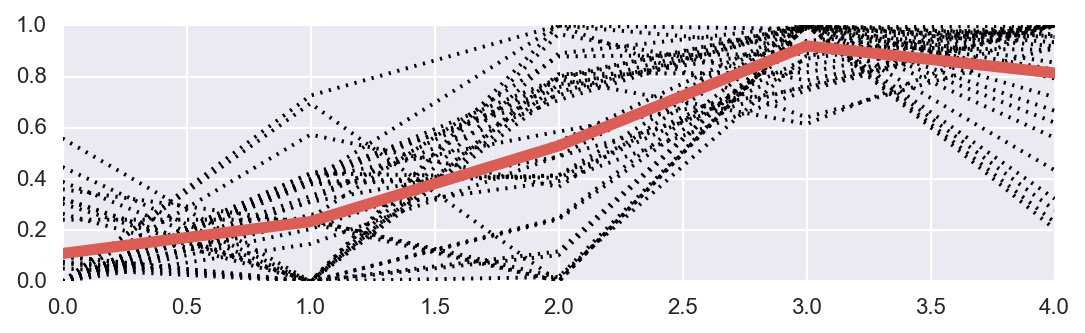

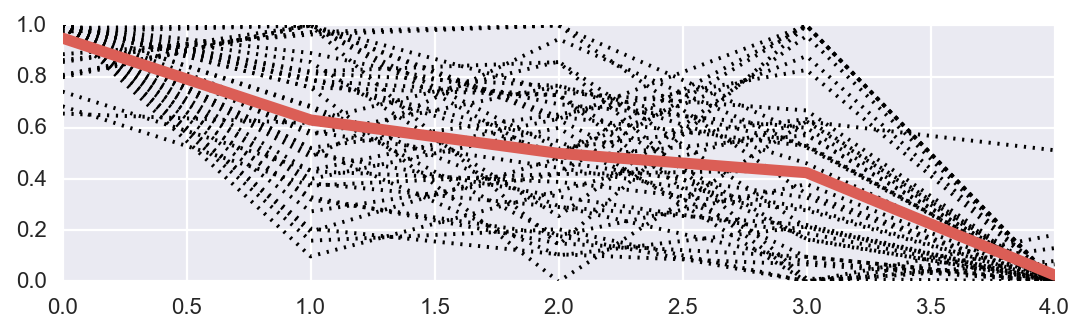

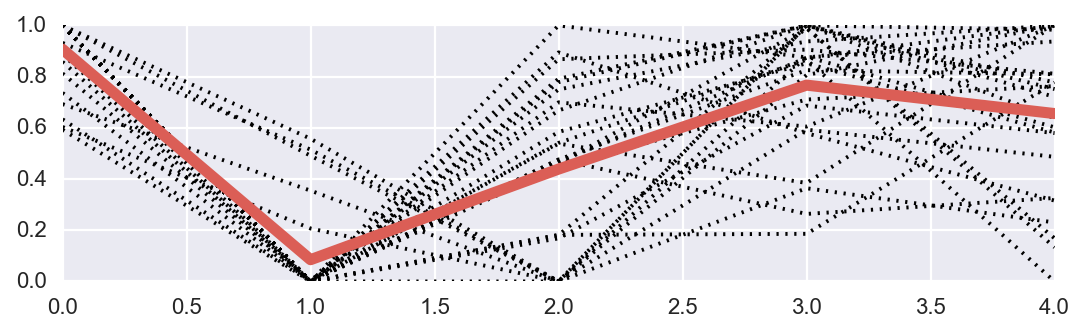

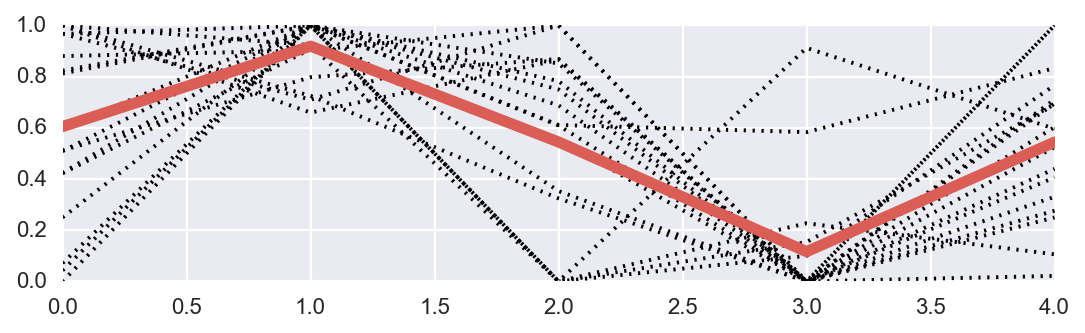

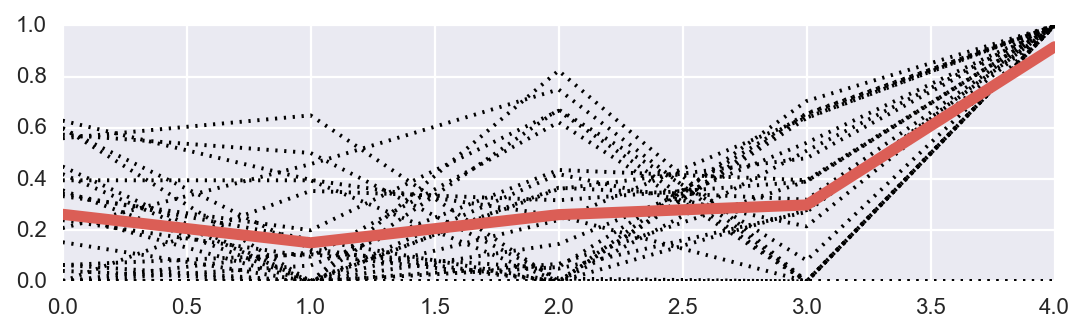

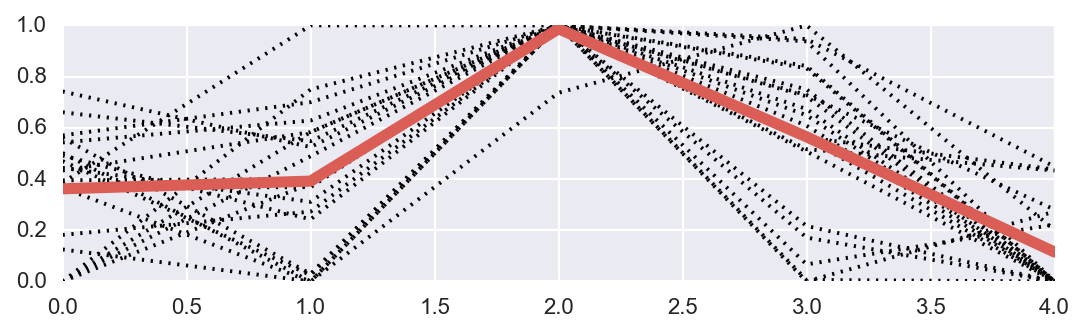

In [101]:
clusters = df['cluster_id'].max()
numbers = []
for i in range(0,clusters+1):
    idf = df[df['cluster_id']==i]
    result = []
    plt.figure(figsize=(8, 2))
    numbers.append(len(idf))
    for idx,row in idf.iterrows():
        
        x1,x2,x3,x4,x5 = row['x1'], row['x2'], row['x3'], row['x4'], row['x5']
        result.append([x1,x2,x3,x4,x5])
        plt.plot([x1,x2,x3,x4,x5],color='#000000',linestyle='dotted')
    data = np.array(result)
    avg1,avg2,avg3,avg4,avg5 = data[:,0].mean(),\
                            data[:,1].mean(),data[:,2].mean(),data[:,3].mean(),\
                        data[:,4].mean()
    plt.plot([avg1,avg2,avg3,avg4,avg5],color='#db5e56', linewidth=5)
    plt.show()


<AxesSubplot:>

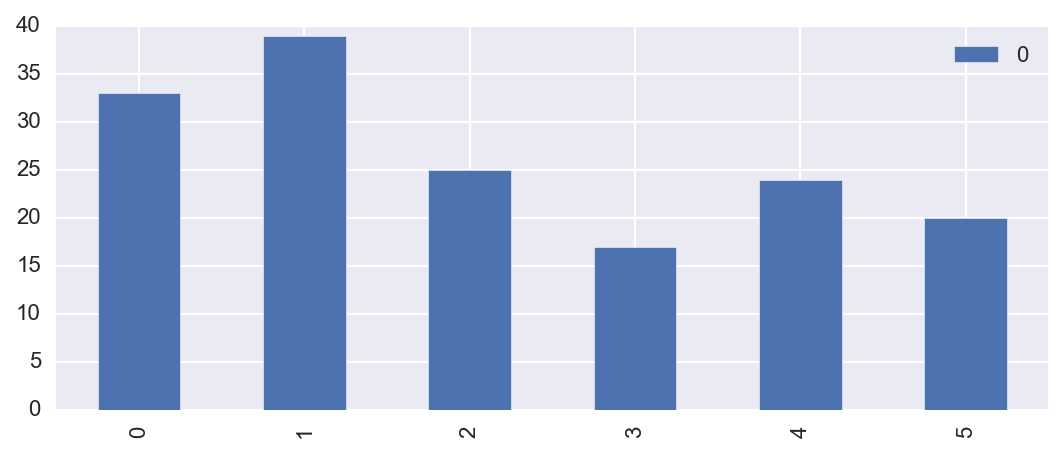

In [103]:
# 클러스터 번호별 속한 데이터 숫자 분포
pd.DataFrame(numbers).plot.bar(figsize=(8,3))


In [27]:
df[df.columns[:17].tolist()+['cluster_id']]

,index,시도,2016|입학정원,2016|입학자수,2016|rate,2017|입학정원,2017|입학자수,2017|rate,2018|입학정원,2018|입학자수,2018|rate,2019|입학정원,2019|입학자수,2019|rate,2020|입학정원,2020|입학자수,2020|rate,cluster_id
0,서울|강남구,서울,440.0,457.0,103.628118,449.0,456.0,101.333333,449.0,439.0,97.555556,554.0,619.0,111.531532,554.0,598.0,107.747748,0
1,서울|강동구,서울,50.0,48.0,94.117647,50.0,86.0,168.627451,50.0,20.0,39.215686,50.0,35.0,68.627451,50.0,27.0,52.941176,3
2,서울|강북구,서울,3621.0,3474.0,95.913860,3561.0,2843.0,79.814711,3561.0,3341.0,93.795620,3561.0,3278.0,92.026951,3561.0,4204.0,118.023582,4
3,서울|강서구,서울,742.0,831.0,111.843876,734.0,850.0,115.646259,3701.0,3214.0,86.817936,3701.0,3055.0,82.522961,3701.0,2684.0,72.501351,1
4,서울|관악구,서울,8453.0,8729.0,103.252898,8447.0,8612.0,101.941288,8491.0,8494.0,100.023552,8471.0,8343.0,98.477337,8457.0,8541.0,100.981319,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,경남|사천시,경남,240.0,320.0,132.780083,240.0,279.0,115.767635,240.0,276.0,114.522822,240.0,268.0,111.203320,240.0,248.0,102.904564,1
157,경남|양산시,경남,2051.0,2175.0,105.994152,1873.0,1939.0,103.468517,1716.0,1926.0,112.172394,1649.0,1832.0,111.030303,1620.0,1835.0,113.201727,0
158,경남|진주시,경남,8501.0,8953.0,105.304634,8224.0,8593.0,104.474164,8135.0,8521.0,104.732055,8084.0,8080.0,99.938157,7870.0,7861.0,99.872951,1
159,경남|창원시,경남,11307.0,11673.0,103.227803,11014.0,11384.0,103.349977,10824.0,11006.0,101.672055,10740.0,10967.0,102.104087,10540.0,10519.0,99.791291,1


In [28]:
df[df.columns[:17].tolist()+['cluster_id']].to_json('./data/data_cluster.json', orient='records',force_ascii=False)
# df.to_json('./data/data.json', orient='records',force_ascii=False)